In [56]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, r2_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix as confusion_matrix_func

In [2]:
# Import dataset
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Replace Columns name with complete name
detailed_column_names = [
    "Age",
    "Sex",
    "ChestPainType",
    "RestingBloodPressure",
    "SerumCholesterol",
    "FastingBloodSugar",
    "RestingECG",
    "MaxHeartRateAchieved",
    "ExerciseInducedAngina",
    "Oldpeak",
    "SlopeOfPeakExerciseSTSegment",
    "NumberOfMajorVessels",
    "Thal",
    "Target"
]

df.columns = detailed_column_names

There are no null values in the dataset

In [5]:
df.describe().round(2)

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,Oldpeak,SlopeOfPeakExerciseSTSegment,NumberOfMajorVessels,Thal,Target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
corr = df.corr().round(2)
print(corr)

                               Age   Sex  ChestPainType  RestingBloodPressure  \
Age                           1.00 -0.10          -0.07                  0.27   
Sex                          -0.10  1.00          -0.04                 -0.08   
ChestPainType                -0.07 -0.04           1.00                  0.04   
RestingBloodPressure          0.27 -0.08           0.04                  1.00   
SerumCholesterol              0.22 -0.20          -0.08                  0.13   
FastingBloodSugar             0.12  0.03           0.08                  0.18   
RestingECG                   -0.13 -0.06           0.04                 -0.12   
MaxHeartRateAchieved         -0.39 -0.05           0.31                 -0.04   
ExerciseInducedAngina         0.09  0.14          -0.40                  0.06   
Oldpeak                       0.21  0.08          -0.17                  0.19   
SlopeOfPeakExerciseSTSegment -0.17 -0.03           0.13                 -0.12   
NumberOfMajorVessels        

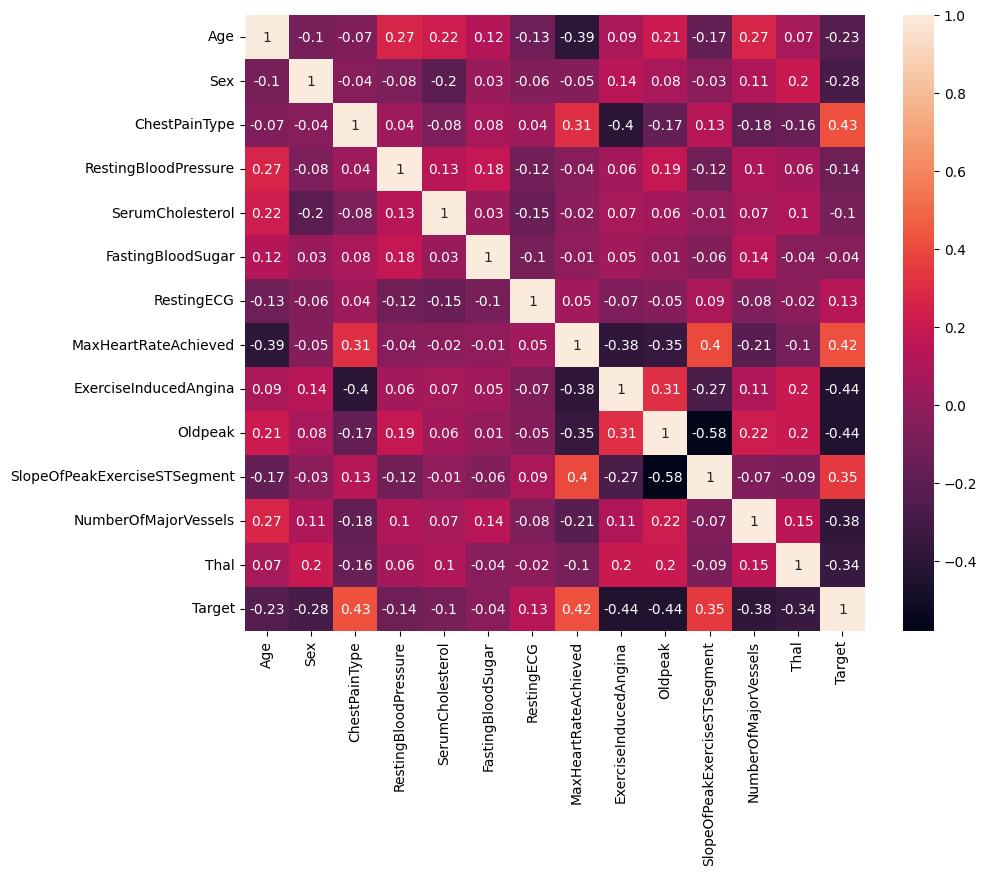

In [7]:
# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
# Check for duplicates
print(df.duplicated().sum())

723


In [9]:
df.shape

(1025, 14)

In [10]:
duplicated_rows = df[df.duplicated()]
duplicated_rows.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,Oldpeak,SlopeOfPeakExerciseSTSegment,NumberOfMajorVessels,Thal,Target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRateAchieved,ExerciseInducedAngina,Oldpeak,SlopeOfPeakExerciseSTSegment,NumberOfMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


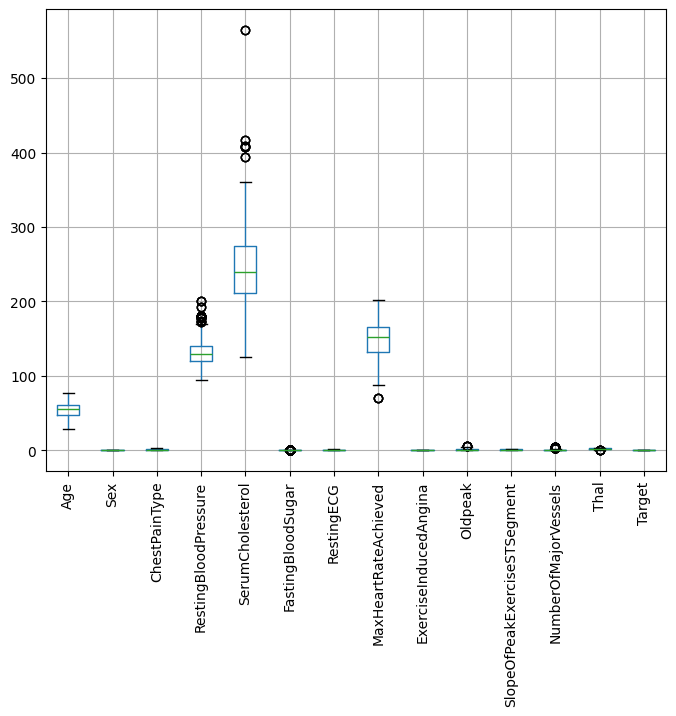

In [12]:
df.boxplot(figsize=(8, 6))
plt.xticks(rotation = 90)
plt.show()

In [13]:
# Assuming df is your dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

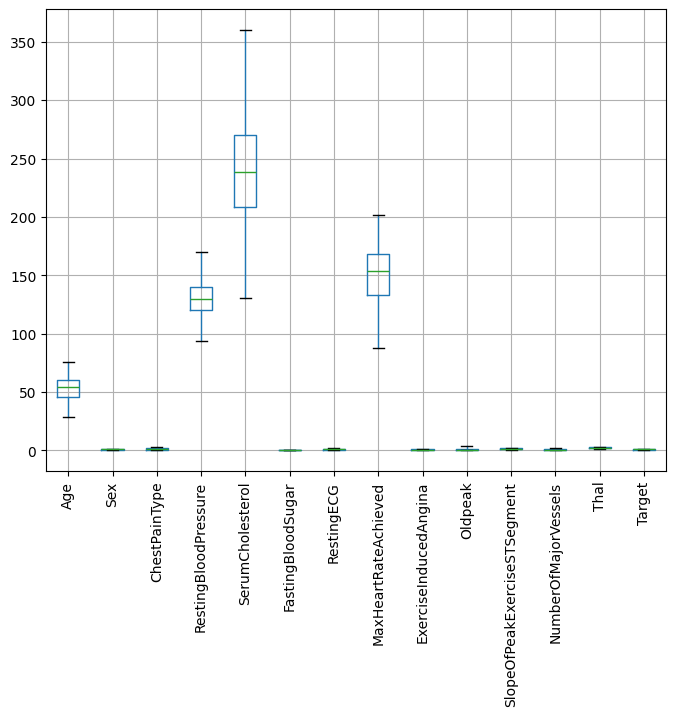

In [14]:
df_cleaned.boxplot(figsize=(8, 6))
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Only select important features
updated_data = df_cleaned.loc[:, [
    "ChestPainType",
    "MaxHeartRateAchieved",
    "SlopeOfPeakExerciseSTSegment",
    "ExerciseInducedAngina",
    "Oldpeak",
    "NumberOfMajorVessels",
    "Thal",
    "Age",
    "Sex",
    "RestingECG",
    "Target"
]]


In [16]:
updated_data.head()

,ChestPainType,MaxHeartRateAchieved,SlopeOfPeakExerciseSTSegment,ExerciseInducedAngina,Oldpeak,NumberOfMajorVessels,Thal,Age,Sex,RestingECG,Target
0,0,168,2,0,1.0,2,3,52,1,1,0
2,0,125,0,1,2.6,0,3,70,1,1,0
3,0,161,2,0,0.0,1,3,61,1,1,0
5,0,122,1,0,1.0,0,2,58,0,0,1
7,0,145,1,1,0.8,1,3,55,1,0,0


In [17]:
# Split dataset into train and test
X = updated_data.drop('Target', axis=1)
y = updated_data['Target']

In [18]:
# Shape of data
print(X.shape)
print(y.shape)

(769, 10)
(769,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Verifying shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(615, 10)
(154, 10)
(615,)
(154,)


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [23]:
X_train.head()

,ChestPainType,MaxHeartRateAchieved,SlopeOfPeakExerciseSTSegment,ExerciseInducedAngina,Oldpeak,NumberOfMajorVessels,Thal,Age,Sex,RestingECG
0,0.082270,0.836665,0.966008,-0.709695,-0.928495,-0.691928,-0.590642,-0.996422,0.635696,0.852058
1,-0.890731,1.535603,0.966008,1.409055,-0.928495,-0.691928,-0.590642,-0.235855,0.635696,-1.074470
2,-0.890731,0.312462,0.966008,-0.709695,-0.359462,2.164015,-2.337012,1.285278,0.635696,-1.074470
3,-0.890731,0.225095,0.966008,-0.709695,-0.833656,0.736044,1.155728,0.524711,0.635696,0.852058
4,2.028273,1.186134,0.966008,1.409055,0.399248,-0.691928,1.155728,-1.431031,0.635696,0.852058


In [24]:
# Creating Logistic Regression Model
model = LogisticRegression()

In [25]:
# initialize different parameters for LR
parameter = {'C': [0.01, 0.1, 2, 1, 4, 100,], 'penalty' : ['l1', 'l2', 'elasticnet'], 'max_iter' : [100, 200], 'solver' : ['newton-cg', 'saga', 'liblinear']}

In [26]:
logit_Reg_CV = GridSearchCV(estimator = model, param_grid = parameter, scoring = 'accuracy', cv = 5)

In [27]:
logit_Reg_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 2, 1, 4, 100], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'saga', 'liblinear']},
             scoring='accuracy')

In [28]:
# Selected best parameters for logistic regression model
print(logit_Reg_CV.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [29]:
# Best score based on different parameters
print(logit_Reg_CV.best_score_)

0.865040650406504


In [44]:
# Evaluating model performance using X_test
predictions = logit_Reg_CV.predict(X_test)

In [38]:
print(r2_score(y_test, predictions))

0.3583333333333333


In [39]:
# Displaying Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        64
           1       0.84      0.90      0.87        90

    accuracy                           0.84       154
   macro avg       0.84      0.83      0.84       154
weighted avg       0.84      0.84      0.84       154



In [55]:
# Area under curve
auc = roc_auc_score(y_test, predictions)
print(auc)

0.8328125


In [45]:
# Overall Prediction Score
logit_Reg_CV.score(X_test, y_test)

0.8441558441558441

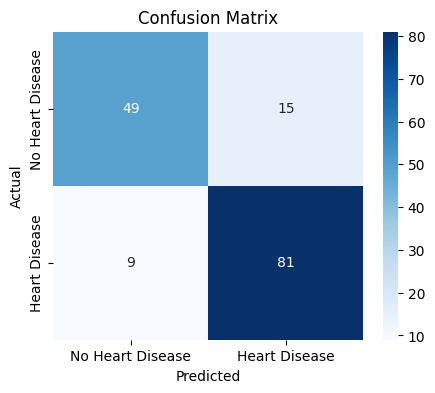

In [49]:
# Generate the confusion matrix
cm = confusion_matrix_func(y_test, predictions)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [57]:
# Save trained model for feature use

import pickle

# logit_Reg_CV (trained model)
filename = 'heart_disease_rl_model.sav'
pickle.dump(logit_Reg_CV, open(filename, 'wb'))


# Later, to load the model:
# loaded_model = pickle.load(open(filename, 'rb'))
